In [71]:
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

In [72]:
sp17 = pd.read_csv('../../data/2017/17_stopped_car_pit.csv')
sp18 = pd.read_csv('../../data/2018/18_stopped_car_pit.csv')
sp19 = pd.read_csv('../../data/2019/19_stopped_car_pit.csv')
sp20 = pd.read_csv('../../data/2020/20_stopped_car_pit.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002924D7AF808>]],
      dtype=object)

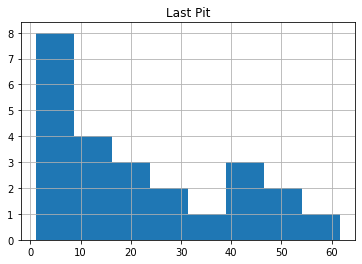

In [73]:
stopped_pit_agg = pd.concat([sp17, sp18, sp19, sp20])
hist = stopped_pit_agg.hist(column='Last Pit', bins=8)
hist

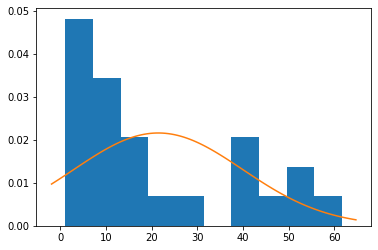

In [74]:
mean,std= norm.fit(stopped_pit_agg['Last Pit'])
plt.hist(stopped_pit_agg['Last Pit'], bins=10, density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
plt.plot(x, y)
plt.show()

In [75]:
data = stopped_pit_agg['Last Pit']
data = data.where(data < 40).dropna()
data_neg = data.multiply(-1)
mirrored_data = pd.concat([data, data_neg])

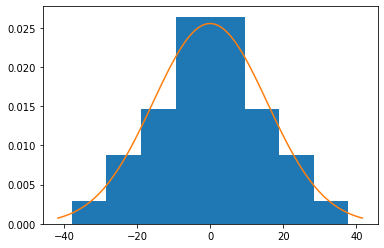

-9.868649107779169e-17
15.610617771584481


In [76]:
mean1,std1= norm.fit(mirrored_data)
plt.hist(mirrored_data, bins=8, density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean1, std1)
plt.plot(x, y)
plt.show()
print(mean1)
print(std1)

(array([1., 2., 0., 2., 2., 1.]),
 array([28.82415   , 34.30104444, 39.77793889, 45.25483333, 50.73172778,
        56.20862222, 61.68551667]),
 <a list of 6 Patch objects>)

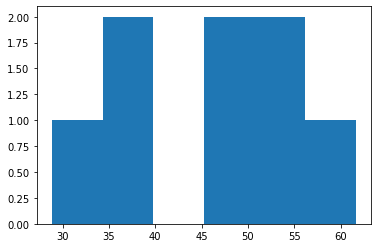

In [77]:
data = stopped_pit_agg['Last Pit']
data = data.where(data >= 45).dropna()
data_neg = data.multiply(-1)
diff = min(data) * 2
data_neg = data_neg.add(diff)
mirrored_data = pd.concat([data, data_neg])
plt.hist(mirrored_data, bins=6)

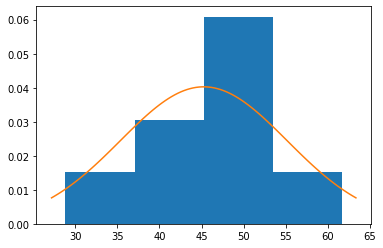

45.25483333333322
9.909181352955741


In [78]:
mean2,std2= norm.fit(mirrored_data)
plt.hist(mirrored_data, bins=4, density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean2, std2) 
plt.plot(x, y)
plt.show()
print(mean2)
print(std2)

In [79]:
data = stopped_pit_agg['Last Pit']
data = sorted(data)
alpha = 4
beta = 1.3
y = []
for d in data:
    y_hat = (alpha*norm.pdf(d, mean1, std1) + beta*norm.pdf(d, mean2, std2))*10
    y.append(y_hat)

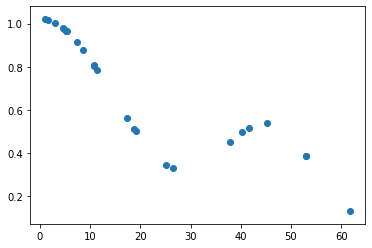

In [80]:
# plt.plot(data, y)
plt.scatter(data, y)
# plt.scatter([35], 4*norm.pdf(35, mean1, std1) + 1.8*norm.pdf(35, mean2, std2), color='red')
plt.show()

In [82]:
def get_risk_score(x):
    alpha = 4
    beta = 1.3
    MEAN1 = 0
    MEAN2 = 45.25483333333322
    STD1 = 15.610617771584481
    STD2 = 9.909181352955741
    return (alpha*norm.pdf(x, MEAN1, STD1) + beta*norm.pdf(x, MEAN2, STD2))*10

In [83]:
pip install ipynb --user

Note: you may need to restart the kernel to use updated packages.
